# **Modeling Racial Disparities in Juvenile Justice**

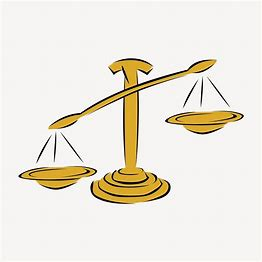


# Introduction

This project expands on research initiated through an internship with the Cumberland County Juvenile Probation Office which revealed that youth from racially marginalized groups are disproportionately referred to the county’s juvenile probation system and are subject to harsher disciplinary outcomes.

This study aims to identify the root causes of disproportionate referral rates in Cumberland County and examine their implications on structural bias within the U.S. juvenile justice system.

# Research Questions and Objectives

**Research Questions:**
  * How do demographic, social, and economic characteristics of a census tract relate to the number of juvenile probation referrals? What will be the number of juvenile probation referrals in future years given these relationships?

  * What demographic and offense-related factors can predict the race/ethnicity of a juvenile referred to Cumberland County’s probation office?

  Note: Due to sensitivity concerns and overall lack of data this project did not have access to data on youth who have not been referred so there are limitations on the models that can be run. But answering these questions, will allow us to better understand the relationship between race and other socio-economic factors in juvenile referrals

**Objectives:**

  * Estimate referral rates on the census-tract level to understand key drivers of juvenile justice involvement.

  * Predict the race of juveniles to determine which demographic and case related factors are strongly correlated with race within the juvenile justice system.

# Getting Started

1. **Clone the Repository**
```bash
 git clone https://github.com/darcelypena/juvenile_justice_research.git
```

2. **Choose your IDE**
  Choose
  Note: This project uses both the Python and R languages to run regression and classification models on referral data.

3. **Install and Load Required Packages**

  **Python Packages Used:**
  * Pandas
  * Numpy
  * Matplotlib
  * RandomForestRegressor
  * mean_squared_error
  * r2_score
  * train_test_split
  * LinearSegmentedColormap
  * plot_tree

  **R Packages Used:**
  * tree
  * dplyr
  * varImp
  * randomForest
  * randomForestExplainer
  * extrafont (extra: not needed for analysis)

  **Example R Package Installation:**
  ```bashr
  # Install packages to local device
  install.packages("tree")
  install.packages("dplyr")
  install.packages("varImp")
  install.packages("randomForest")
  install.packages("randomForestExplainer")
  install.packages("extrafont")
  ```
  **Example R Loading Libraries:**
  ```bashr
  # Load the libraries
  library(tree)
  library(dplyr)
  library(varImp)
  library(randomForest)
  library(randomForestExplainer)
  library(extrafont)
  ```
  Example Python Package Installation:
  ```bashr
  # Install packages to local device
  !pip install pandas numpy matplotlib scikit-learn
  ```

  Example Loading Packages in Python:
  ``` bashr
  # Import general libraries
  import pandas as pd
  import numpy as np
  import matplotlib.pyplot as plt

  # For colormap
  from matplotlib.colors import LinearSegmentedColormap

  # scikit-learn tools
  from sklearn.ensemble import RandomForestRegressor
  from sklearn.metrics import mean_squared_error, r2_score
  from sklearn.model_selection import train_test_split
  from sklearn.tree import plot_tree
  ```

# Data:

**Data Sources:**
  * **Pennsylvania Case Management System:** case records for juveniles from 2012 to 2022 who were referred to the Cumberland County Juvenile Probation Office, along with information on charges and dispositions received
  * **US Census - ACS Survey:** demographic, social, and economic characteristics for all census tracts in Cumberland County from 2012 to 2022

**Cleaned Data Tables:**

1. **census_referrals:** contains relevant demographic, social, and economic characteristics for each census tract in Cumberland County on a yearly basis along with the number of juvenile referrals.
  * 140 rows, 26 columns
  * Columns: location, year, total households, count of youth in elementary school, count of youth in high school, average family size, unemployment rate, mean household income
  * Import Dataset (Python):
  ```
  census_referrals = pd.read_excel('../census_referrals.xlsx')
  ```

# Models

1. **Predicting Juvenile Referral Counts**
  
  A Random Forest regression model was used to predict juvenile referral counts at the census tract level in Cumberland County and to explore which societal factors are most strongly associated with higher referral rates.

  We chose to use a Random Forest model because it is well-suited for capturing nonlinear relationships, which is important given that juvenile referrals are likely influenced by complex interactions among societal factors. Unlike a single decision tree, which can easily overfit a small dataset, Random Forest reduces this risk by averaging the results of multiple trees, improving generalizability. Additionally, Random Forest provides estimates of feature importance, helping us identify which societal variables are most strongly associated with higher referral counts.


2. **Predicting Race of Referral Recipient**

  A Random Forest model was trained to classify a referral recipient’s race. The most influential variables were then examined to seek out patterns between the predictors for each race.

  A random forrest model was chosen for this analysis to get a better idea of the range of importance the various predictors could possess. Additionally, random frorests are robust models that can handle, to an extent, disproportionate dependent variable distributions--making them great for a data like this, with ~2000 white referral recipients, ~1000 African American referral recipients, ~500 Multiracial, and 5 Asian. Additionally, the random forest explainer provides a nice visual representation of the distribution of node-levels each predictor fell into over 100 different trees.



# Results

1. **Predicting Juvenile Referral Counts**

  The Random Firest regression model has a 94% accuracy in predicting juvenile referral counts and a mean squared error of 1.28.

  **Top Feature Importances:**
  * count of youth in high school grades 9-12
  * count of Black or African American residents
  * count of Asian or Asian American residents
  
  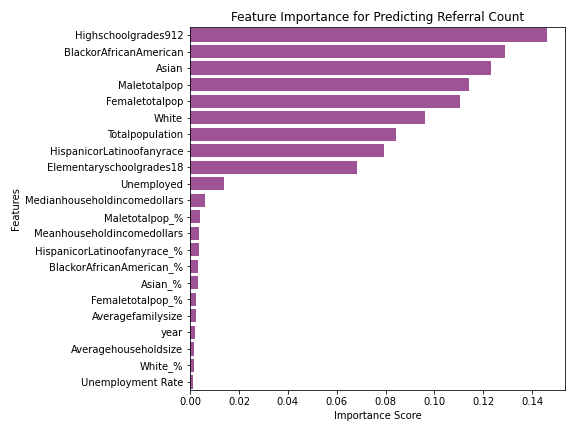
  
   **Features with Highest Average Split Depth**
 * total population of females (4.2)
 * count of African American residents (4.8)
 * count of youth in high school grades 9-12 (4.9)

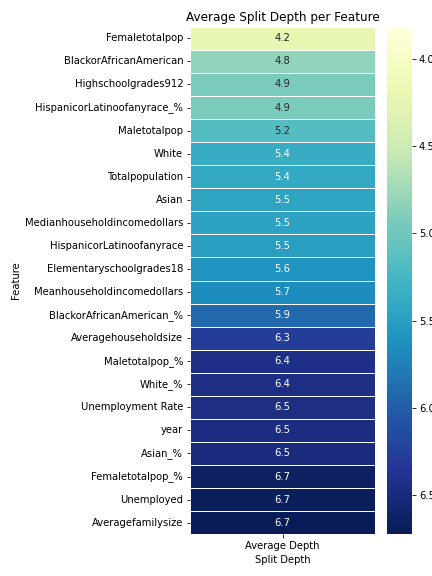

2. **Predicting Referred Recipient's Race**

  The Random Forest regression model has a 83.6% accuracy in predicting the race of a referred recipient.

  **Primary Split Features:**
  * parent status - signifies whether the referred recipient comes from a home with married, divorced, separated, or single parent home
  * offense category- such as criminal mischief, theft-related, trespass, or simple assault
  * age at referral

  **Least Influential Split Features (lowest in tree):**
  * charge group-whether the charge was substantiated, reduced, guilty, or amended
  * state and county disposition- indicates whether the juvenile was transfered, consent decree was extended, or the juvenile received probation

  This bar chart demonstrates the overall importance of each feature: 
  
  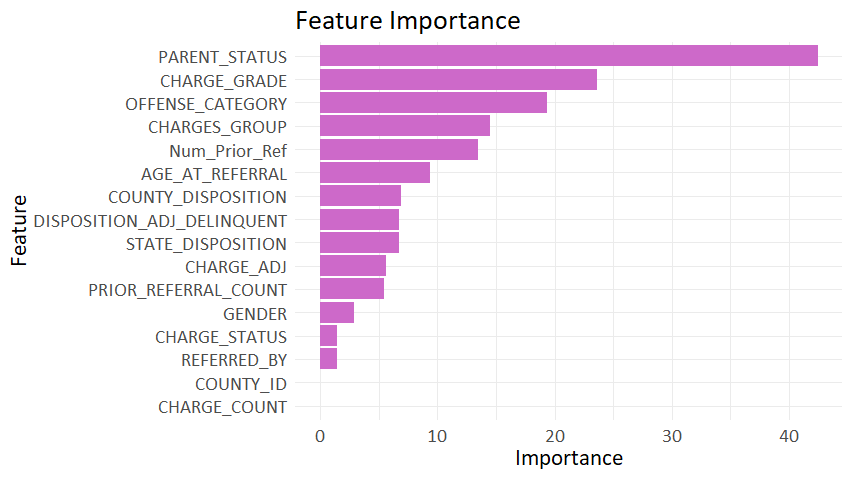

   


The tree below is randomly chosen from the 100 in the forest, and cut for simplicity, to represent what the forest could include:
     
   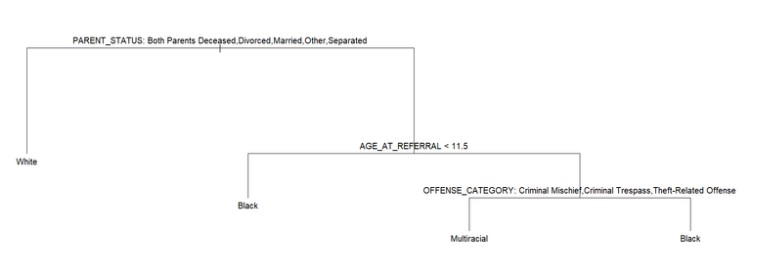
    


   This image displays the depth distribution of each parameter as the number of trees grows:
     
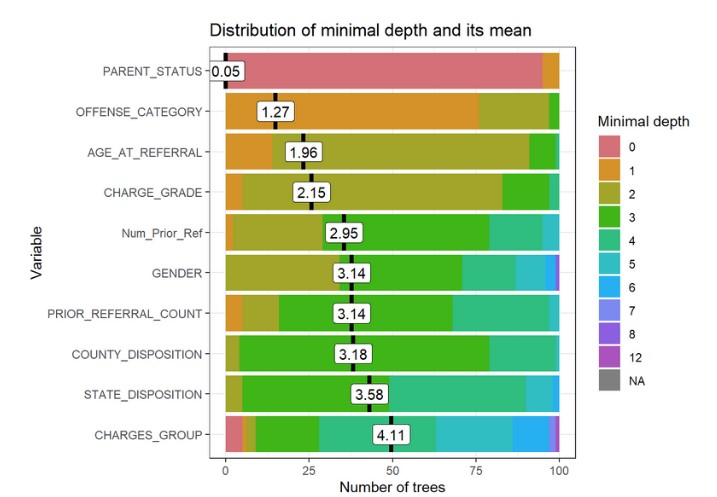
   

# Conclusions

Strong predictors of referrals counts are race, youth population density, and unemployment. This model highlights potential structural biases in the juvenile justice system as race is consistently the most important feature. The role of economic factors are secondary suggesting other systematic influences in demographic makeups.

Some of the strongest predictors of race in this analysis were factors not included in the judicial system, but instead in the recipient’s homes. It was found that white referral recipients came from homes with both parents deceased, divorced, married, or separated, with black and multi-race recipients coming from mainly single parent homes. From there, age and type of offense were used to differentiate between the other races--indicating certain races follow patterns in their age and type of crime committed.

# Social, Legal, & Ethical Implications

**Social:**

This model indicates that areas with higher youth populations and certain racial demographics have higher referral rates. Social services and community organizations may use this data to target interventions and offer resources to at risk-youth. This includes recognizing youth of various races could be considered “at risk” for different reasons.

**Legal:**

The strong influence of race in predicting referral rates could indicate discriminatory practices within the juvenile justice system. This would call for legal reform aimed at reducing racial disparities.

**Ethical:**

If the model identifies a particular racial group as a key factor in higher referral rates or certain types of crimes, it can inadvertently stigmatize that community and perpetuate harmful stereotypes.